# Project 01: Collision mini-project
* **Due:** Wednesday, Oct 18, 2023 at the start of class<br> (I got an extension :p)
* **Name:** Nicholas Zaparniuk

# Instructions:
This mini project is designed to prepare you for Projects 02-04 by reducing some of the communication expectations with respect to the later project. Below, you are given incomplete code that, when complete, should simulate what happens when two objects (balls) collide with each other and with barriers on either side. You have five tasks for this mini project:

* **Task 1:** Update the starter code so that the collision between the two obejcts is handled correctly.
* **Task 2:** Extend the physics of the simulation by introducing at least one additional challenging or interesting piece of physics (see below for some examples).
* **Task 3:** Develop a multi-subplot graph that provides insight into the behaviour of your simulation. At least one of these subplots should be a new or novel visualization that we have not yet seen in the course, which provides further insight into the behaviour of your simulation.
* **Task 4:** Choose two different sets of starting parameters and peform some calcualtions by hand to confirm that your simulation is behaving correctly. You can focus on the first collision with these calculations.
* **Task 5:** Perform a series of self-assessments and reflections regarding how thoroughly you completed each task and how much you extended yourself when completing this mini-project.

As outlined in the course's [overview of project assessment](https://physics210.github.io/phys210-w23/project_assessment.html), your project grade will be built from the following:
1. The points awarded on the project assessment scale during your self-assessment, as updated by the grader.
1. The grader's assessment of the accuracy of your self-assessments and the thoroughness of your reflections.

Examples of interesting of challenging physics you could include in your simulation:
* Incorporating an adjustable coefficient of restitution.
* Incorporating rolling or other relevant types of friction.
* Incorporating other external forces or energy by having the objects be two pendula, two objects on an inclined plane, etc.
* Turning it into a two-dimensional collision.


# Code
*Below is your starter code. In the text before the code, provide a brief description of what new physics you added in. Make sure to provide comments in your code so that a peer from this course could easily make sense of what you have done.*


**Description of new physics:** The balls have fully elastic collisions with each other and the wall. The balls are made out of ice so after each collision with each other and the wall they lose a certain amount of mass. If they hit each other it is 2 times the mass loss and  

In [7]:
import matplotlib.pyplot as plt

# Constants
dt = 0.05  # s
tmax = 100  # s
t = [0.]  # List to store time values corresponding to position values
left_barrier = -15  # m
right_barrier = 15  # m
mass_loss = 0.5

# Object 1
xi1 = -10  # m
vi1 = 5  # m/s
x1 = [xi1]  # List to store position values
v1 = [vi1]  # List to store velocity values
r1 = 1  # m
m1 = 10  # kg
mass1 = [m1]  # List to store mass values

# Object 2
xi2 = 10  # m
vi2 = -4  # m/s
x2 = [xi2]
v2 = [vi2]  # List to store velocity values
r2 = 0.55  # m
m2 = 6  # kg
mass2 = [m2]  # List to store mass values


# Elastic collision function
def elastic_collision(v1_initial, v2_initial, m1, m2):
    v1_final = ((v1_initial * (m1 - m2) + 2 * m2 * v2_initial) / (m1 + m2))
    v2_final = ((v2_initial * (m2 - m1) + 2 * m1 * v1_initial) / (m1 + m2))
    return v1_final, v2_final

# Flag to track the first collision
first_collision = False

while t[-1] < tmax:

    # Retrieve the kinematic quantities from the previous iteration
    x1_last = x1[-1]
    v1_last = v1[-1]
    x2_last = x2[-1]
    v2_last = v2[-1]
    t_last = t[-1]

    # Calculate new physical quantities
    x1_new = x1_last + v1_last * dt
    x2_new = x2_last + v2_last * dt
    v1_new = v1_last
    v2_new = v2_last
    t_new = t_last + dt

    # Check for collisions and update kinematic quantities as needed
    if m1 > 0 and m2 > 0:
        if x2_new - x1_new <= r1 + r2:
            if not first_collision:
                print("First collision occurred at t =", t_last)
                first_collision = True
            # Elastic collision between the balls
            v1_new, v2_new = elastic_collision(v1_new, v2_new, m1, m2)

            # Reduce the mass of both balls
            m1 -= mass_loss
            m2 -= mass_loss

    if m1 <= 0:
        # If Ball A's mass reaches zero, add the last position value to maintain dimensions
        x1_new = x1[-1]
        v1_new = 0
        m1 = 0  # Ensure mass remains non-negative

    if m2 <= 0:
        # If Ball B's mass reaches zero, add the last position value to maintain dimensions
        x2_new = x2[-1]
        v2_new = 0
        m2 = 0  # Ensure mass remains non-negative

    if x1_new + r1 >= right_barrier or x1_new - r1 <= left_barrier:
        v1_new = -v1_new

        # Apply mass loss when Ball A hits the wall
        if m1 > 0:
            m1 -= mass_loss

    if x2_new + r2 >= right_barrier or x2_new - r2 <= left_barrier:
        v2_new = -v2_new

        # Apply mass loss when Ball B hits the wall
        if m2 > 0:
            m2 -= mass_loss

    # Append updated quantities to their lists
    x1.append(x1_new)
    x2.append(x2_new)
    v1.append(v1_new)
    v2.append(v2_new)
    t.append(t_new)
    mass1.append(m1)
    mass2.append(m2)


First collision occurred at t = 2.0500000000000007


# Visualizations

*Below is where you should include your code for your visualizations. Make sure to include your own new or novel way of visualizing this simulation and provide a brief description of your new or novel visualization below. If you use multiple visualizations, please use a single canvas with subplot(s).*

**Description of new or novel visualization:** (your words here...)

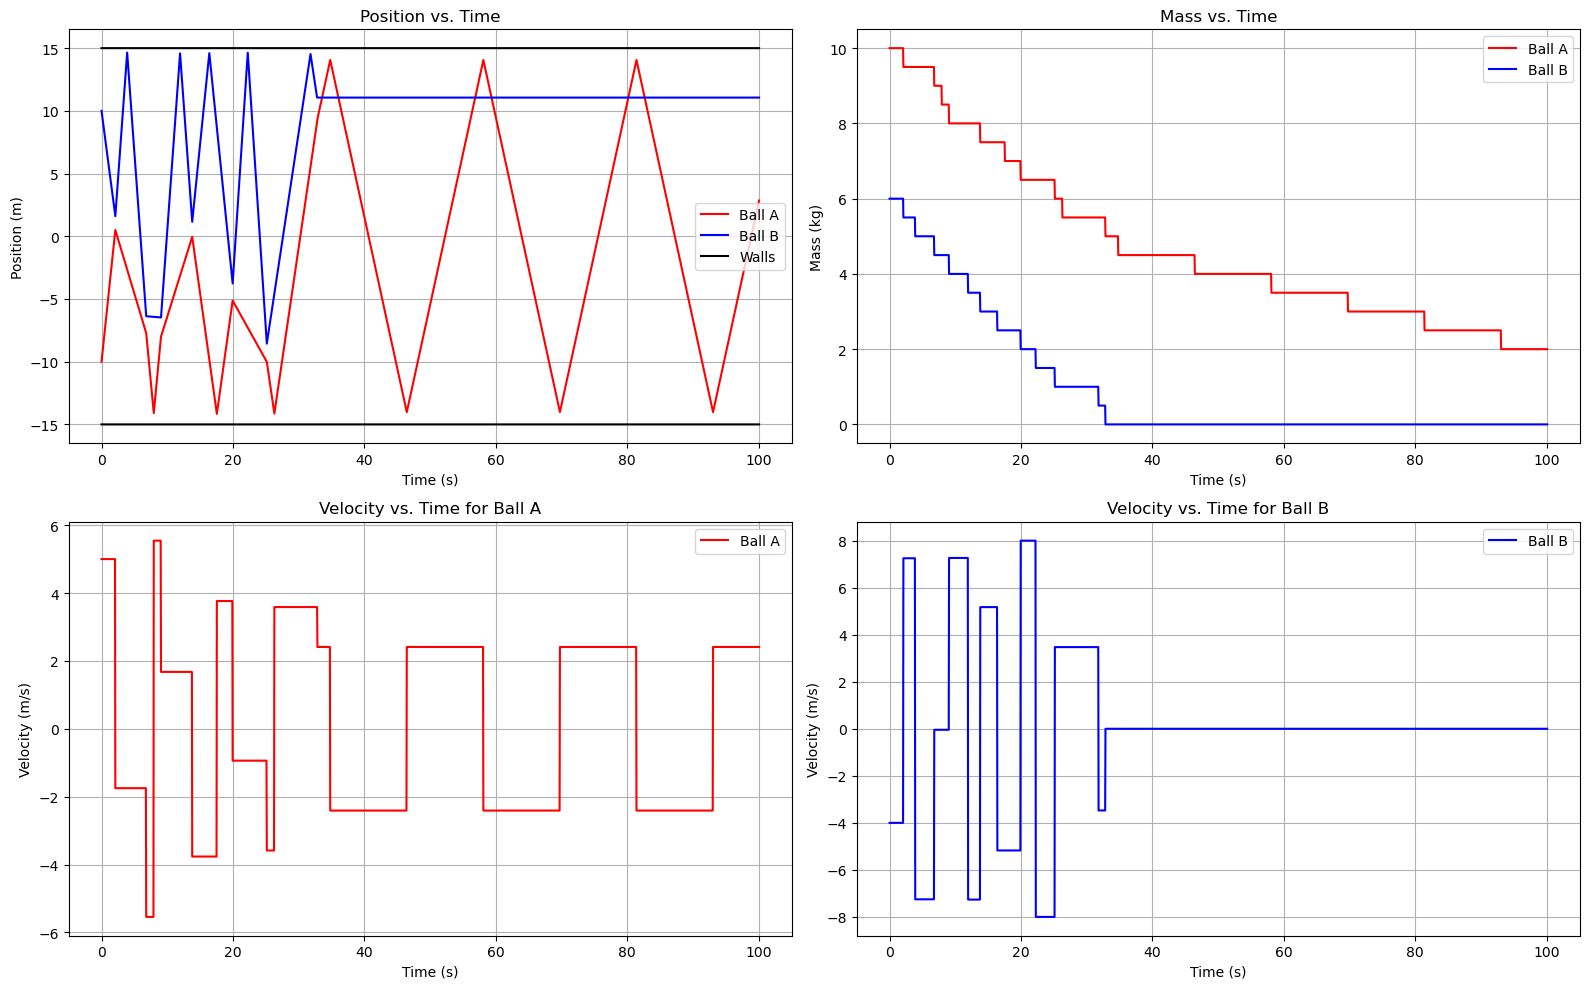

In [6]:
import matplotlib.pyplot as plt 

# Wall 1 and 2
wall1 = [left_barrier] * len(t)
wall2 = [right_barrier] * len(t)

# Create subplots for velocity vs. time and mass vs. time of each ball
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Position vs. Time for Ball A and Ball B
axs[0, 0].plot(t, x1, label='Ball A', color='red')
axs[0, 0].plot(t, x2, label='Ball B', color='blue')
axs[0, 0].plot(t, wall1, label="Walls", color='black')
axs[0, 0].plot(t, wall2, color='black')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Position (m)')
axs[0, 0].set_title('Position vs. Time')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot 2: Velocity vs. Time for Ball A
axs[1, 0].plot(t, v1, label='Ball A', color="red")
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('Velocity (m/s)')
axs[1, 0].set_title('Velocity vs. Time for Ball A')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot 3: Velocity vs. Time for Ball B
axs[1, 1].plot(t, v2, label='Ball B', color='blue')
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_ylabel('Velocity (m/s)')
axs[1, 1].set_title('Velocity vs. Time for Ball B')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Plot 4: Mass vs. Time for Ball A and Ball B
axs[0, 1].plot(t, mass1, label='Ball A', color='red')
axs[0, 1].plot(t, mass2, label='Ball B', color='blue')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Mass (kg)')
axs[0, 1].set_title('Mass vs. Time')
axs[0, 1].grid(True)
axs[0, 1].legend()

plt.tight_layout()
plt.show()

# Comparison of simulation results to calculations
*Below show the results of your simulation compared with your by-hand calculations using two different sets of starting parameters. Make sure to discuss 

Use as many code blocks below as needed for re-running your code with different starting parameters and extracting the relevant quantities. Your calculations only need to be performed for the first collision between the two objects for each set of parameters. Show your calculation work either using LaTeX in the markdown cell or by uploading a document/picture on Canvas as part of your submission.*

**Your calculation work here in Latex (or you can upload a document/picture on Canvas):**

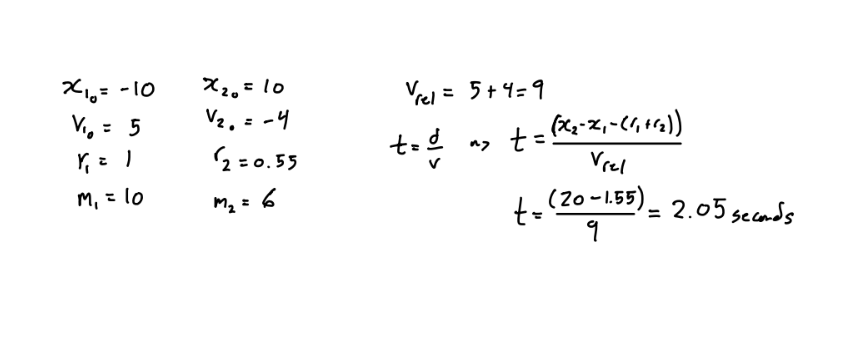

**Discussion of how your by-hand calculations verify the output of your simulation:** 

- My hand written calculations can be used to verify that the code is working correctly by directly comparing the expected results with the actual results produced by the code. This also helps check for debugging and seeing if there are any discrepancies between the hand calculations and the code's output.

# Self-assessments and reflections
Please visit the [Project 01 assessment criteria Section](https://physics210.github.io/phys210-w23/project_assessment.html#21-project-01-assessment-criteria) of the Grading and self-assessment document for the detailed criteria to use in your self-assessments.


### *Self-assessment 1: Coding approaches*
*Discuss how you applied and extended your coding knowledge in this project. Consider steps you took to make the code more efficient, more readable or more concise. Discuss any new-to-you coding techniques that you learned or python packages you looked up. Mention something you feel you did particularily well and discuss what would be the next improvement you would make if you had more time.*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** 
* (**Publish**)



**Discussion of your coding approaches and justification of your rating:** 

* I think that assessing myself at publish is fair. I had a very busy week and was unfortunately unable to hand in the assignment on time, and because of this I really wanted to put some attention and care into the readability and conciseness of my code. I took some python courses last year but I still consider myself to be fairly new to coding. During this project I was able to learn about flag variables, continued applications of subplots, and how to think a bit more abstractly in order to come up with solutions.


### *Self-assessment 2: Physics and physics translation approaches*
*Discuss how you applied and extended your physics knowledge in this project. Consider how you translated physics into code representations, how you used your physics knowledge to verify output, and any new physics you learned or developed a more thorough understanding of. Mention something you feel you did particularily well and discuss what would be the next improvement you would make if you had more time.*




**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** 
* (**Publish**)



**Discussion of your physics and physics translation approaches and justification of your rating:**
* There are no parameters missing or errors in my calculations and they also clearly verify that my simulation is working as intended. However, I refrain from grading myself any higher because this system does not feel complex enough to constitute giving myself an "outstanding". With that being said I still believe that the physics between two colliding ice balls sounds cool and it is life like to assume that ice would chip and lose mass after each collision. 
* I think that I would innovate this further by either adding a thermostat that, if hot enough, adds a constant mass loss over time; or, if cold enough, makes the ice too hard to lose any mass at all. 
* A second innovation that would be really interesting to implement is a random mass loss between a certain range of say (0.1-0.5 kg) that way it is more life like and has a bit more uncertainty - which would also lead to cool visualizations.

### *Self-assessment 3: Effectiveness of your visualizations*

*Discuss how well your visualizations summarized the outcomes of the simulation. Describe how you included a new or novel visualization. If you used multiple visualzations, how effective was your use of subplots? Did you make effective use of plot labels, titles and legends? Mention something you feel you did particularily well and discuss what would be the next improvement you would make if you had more time. The self-assessment of this category should be based on the overall effectiveness of your visualizations.*



**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):**
* (**Publish**)



**Discussion of the effectiveness of your visualizations and justification of your rating:** 
* My visualizations are presented well and display the position vs time with added visuals of where the walls are, the velocity vs time for each ball, as well as the mass over time and how that changed after each collision. They are all contained in a 2x2 subplot with different colours representing each line. The graphs are correctly labeled (with units), legends and grids are included, and they are a size that is not too large yet also readable. 

* My graphs provide easy to comprehend insight on the workings of my system over time  and there are no occurances of any behaviours that deviate from what we would see outside of a simulation (there are no glitches). Further more I overlapped the wall positions into the position vs time graph to give the data a more visual aspect compared to how data has been displayed previously in the class.

### *Self-assessment 4: Unforeseen challenges*

*Detail at least three unforseen challenges you faced in completing this project. These challenges could be errors that were effortful to debug or didn't understand and had to look up; functions you realized you didn't understand and had to look up or ask somebody about; tasks that took a lot longer than expected, or anything else that surprised you along the way. The self-assessment of this category should be based on the thoroughness of your discussion of these unforseen challenges.*

**Self-assessment rating (*Outstanding, Publish, Minor Revisions, Major Revisions, Rework, Absent*):** 
* (**Publish**)



**Discussion of unforeseen challenges and justification of your rating:** 
- For my visualization the lines representing the position of the balls would sometimes phase through each other. At first I was very confused by this, but then after a while I realized it had to do with the time step and detection methods I was using. By reducing the time step and sacrificing simulation speed,  I was able to gain a more accurate visualization of the collisions

- The second challenge I had was when the mass of the balls reached zero as this resulted in a division by zero. I resolved this issue by adding the conditions for if the mass is less than or equal to zero. This condition appends the last position of the ball just before it got to zero. This maintains its position on the graph without adding anymore collisions to it.

- I added walls on the outside, and originally I had a little bit of trouble making sure that the length of the walls was the same as the collisions time of tmax. I did this by making two different lists of wall1 and wall2 that are filled with the barrier position. I resolved the issue by multiplying the lists by the length of the time list t.

- Another challenge I had when trying to set up a flagging system for when the first collision of the balls occurs. I wanted to do this to make the verification of my code easier. I was able to resolve this by essentially making a flagger variable that was false and after one of the balls collisions (in this case the first after being run) the variable was changed to true. Making the code then run as normal. I had never done this before so I was stuck for a little while and also required a bit of online assistance; however, I'm happy with how it turned out.
